In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
ohe = OneHotEncoder(sparse_output=False)  # sparse=False returns a NumPy array
encoded = ohe.fit_transform(df[['species']])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['species']))
print(encoded_df)

     species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica
0                    1.0                      0.0                     0.0
1                    1.0                      0.0                     0.0
2                    1.0                      0.0                     0.0
3                    1.0                      0.0                     0.0
4                    1.0                      0.0                     0.0
..                   ...                      ...                     ...
145                  0.0                      0.0                     1.0
146                  0.0                      0.0                     1.0
147                  0.0                      0.0                     1.0
148                  0.0                      0.0                     1.0
149                  0.0                      0.0                     1.0

[150 rows x 3 columns]


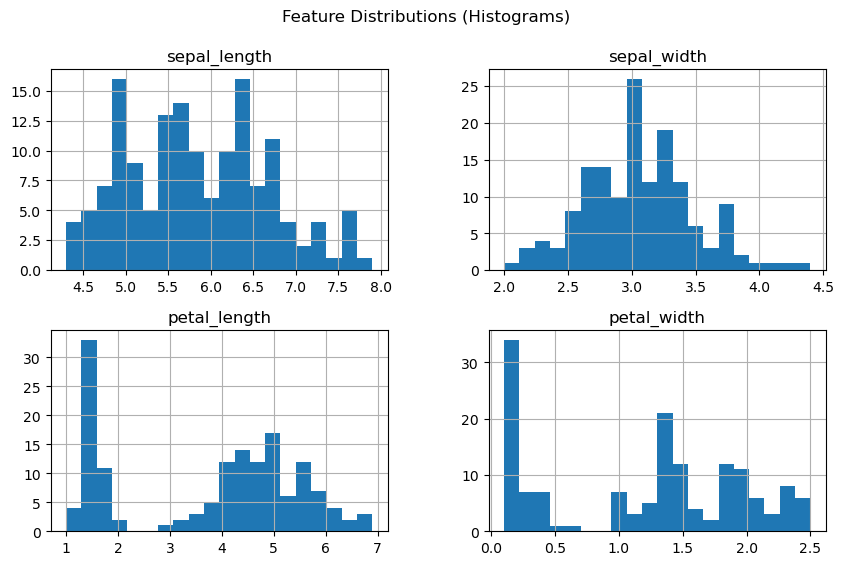

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(10, 6), bins=20)
plt.suptitle("Feature Distributions (Histograms)")
plt.show()

#### 5. Split Dataset into Features and Target

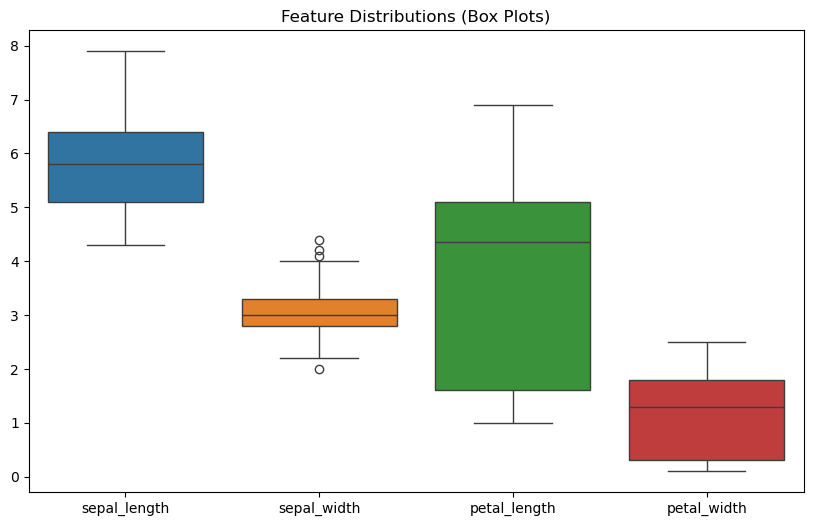

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['species']))
plt.title("Feature Distributions (Box Plots)")
plt.show()

In [24]:
X = df.drop(columns=['species'])
y = df['species']

#### 6. Split the Data into Training and Testing Sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc

StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#### 8. Make Predictions

In [31]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [32]:
 confusion_matrix(y_test, y_pred)
#print("\nConfusion Matrix:\n", cm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

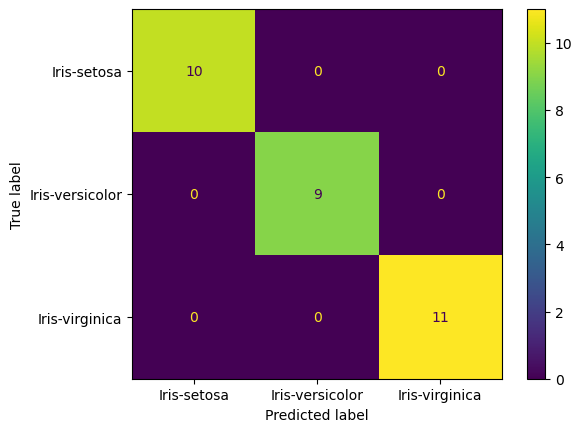

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#### 9. Evaluate the Model

In [35]:

TP = cm[1, 1]  # True Positives (for class 1)
TN = cm[0, 0]  # True Negatives (for class 0)
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print('TP:', TP, 'TN:', TN, 'FP:', FP, 'FN:', FN)
print('Accuracy:', accuracy)
print('Error Rate:', error_rate)
print('Precision:', precision)
print('Recall:', recall)

NameError: name 'cm' is not defined

#### 10. Visualize Confusion Matrix

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()